In [1]:
import numpy as np
import re
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
news_df=pd.read_csv("Fakenews.csv")

## preprocessing

In [3]:
news_df.isnull().sum()

Unnamed: 0      0
title         558
text           39
label           0
dtype: int64

In [4]:
news_df.shape

(72134, 4)

In [5]:
news_df=news_df.fillna(' ')

In [6]:
news_df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [7]:
news_df['content']=news_df['title']

In [8]:
news_df

,Unnamed: 0,title,text,label,content
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,LAW ENFORCEMENT ON HIGH ALERT Following Threat...
1,1,,Did they post their votes for Hillary already?,1,
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,"Bobby Jindal, raised Hindu, uses story of Chri..."
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,SATAN 2: Russia unvelis an image of its terrif...
...,...,...,...,...,...
72129,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0,Russians steal research on Trump in hack of U....
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1,WATCH: Giuliani Demands That Democrats Apolog...
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0,Migrants Refuse To Leave Train At Refugee Camp...
72132,72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0,Trump tussle gives unpopular Mexican leader mu...


# seprating the data and label

In [9]:
X=news_df.drop('label',axis=1)
y=news_df['label']

In [10]:
print(X)

       Unnamed: 0                                              title  \
0               0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
1               1                                                      
2               2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
3               3  Bobby Jindal, raised Hindu, uses story of Chri...   
4               4  SATAN 2: Russia unvelis an image of its terrif...   
...           ...                                                ...   
72129       72129  Russians steal research on Trump in hack of U....   
72130       72130   WATCH: Giuliani Demands That Democrats Apolog...   
72131       72131  Migrants Refuse To Leave Train At Refugee Camp...   
72132       72132  Trump tussle gives unpopular Mexican leader mu...   
72133       72133  Goldman Sachs Endorses Hillary Clinton For Pre...   

                                                    text  \
0      No comment is expected from Barack Obama Membe...   
1         Did t

#Stemming

In [11]:
ps = PorterStemmer()
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [ps.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [12]:
news_df['content'] = news_df['content'].apply(stemming)

In [13]:
news_df['content']

0        law enforc high alert follow threat cop white ...
1                                                         
2        unbeliev obama attorney gener say charlott rio...
3        bobbi jindal rais hindu use stori christian co...
4        satan russia unv imag terrifi new supernuk wes...
                               ...                        
72129    russian steal research trump hack u democrat p...
72130    watch giuliani demand democrat apolog trump ra...
72131         migrant refus leav train refuge camp hungari
72132    trump tussl give unpopular mexican leader much...
72133           goldman sach endors hillari clinton presid
Name: content, Length: 72134, dtype: object

#seprating the data and label

In [14]:
X = news_df['content'].values
y = news_df['label'].values

# Converting the textual data to numerical data

In [15]:
vector = TfidfVectorizer()
vector.fit(X)
X = vector.transform(X)

In [16]:
print(X)

  (0, 19106)	0.19134939529376566
  (0, 18648)	0.1297506867782943
  (0, 17363)	0.2542650376115143
  (0, 17260)	0.24871262252022117
  (0, 9699)	0.22829788917209384
  (0, 7887)	0.26746434949988324
  (0, 6730)	0.48553136502134386
  (0, 6425)	0.28932771754845743
  (0, 5509)	0.31820565801047196
  (0, 3679)	0.24871262252022117
  (0, 1802)	0.33473541566384035
  (0, 407)	0.3190180925014663
  (2, 18648)	0.13443733492985524
  (2, 18034)	0.35962437110547785
  (2, 16446)	0.1999703023632961
  (2, 15094)	0.1609967301122813
  (2, 14591)	0.3580030298678158
  (2, 13591)	0.22687620695463123
  (2, 12744)	0.27904818164471595
  (2, 12011)	0.16878852994653004
  (2, 11864)	0.2231406266784195
  (2, 8020)	0.2692285294185893
  (2, 6880)	0.2652283770602196
  (2, 2919)	0.3639616996972358
  (2, 2673)	0.30809679188606154
  :	:
  (72130, 1768)	0.49293214478810593
  (72130, 764)	0.39870380407772993
  (72131, 17617)	0.39738745004026604
  (72131, 14186)	0.3534104623564766
  (72131, 14182)	0.32391500471431983
  (72131, 1

In [17]:
## split into train test data
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=2)
X_train.shape

(57707, 19639)

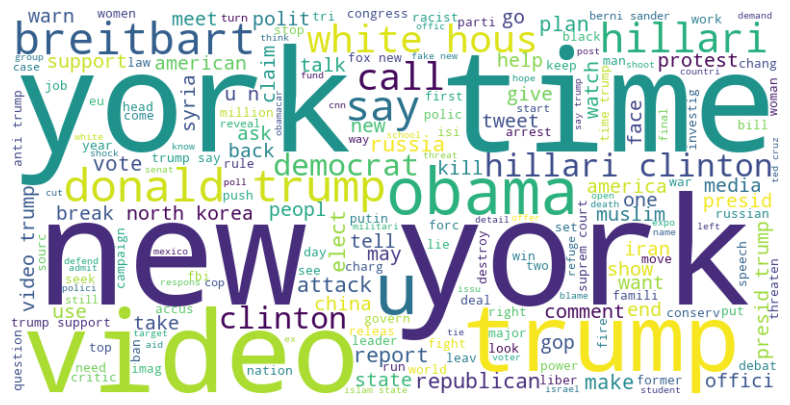

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(news_df['content']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


# Train the model

In [19]:
model = LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [20]:
#on training set
# on training set
train_y_pred = model.predict(X_train)
print(accuracy_score(train_y_pred,Y_train))


0.9199403885143916


In [21]:
# on testing set
testing_y_pred = model.predict(X_test)
print(accuracy_score(testing_y_pred,Y_test))

0.900603035974215


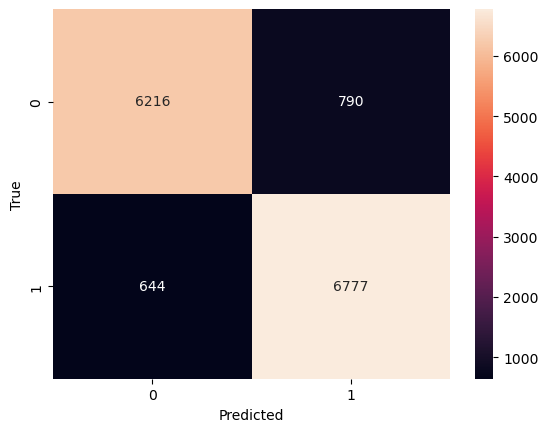

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(Y_test, testing_y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# Detection 

In [23]:
input_data = X_test[10]
prediction = model.predict(input_data)

In [25]:
if prediction[0] == 0:
    print('The News Is Real')
else:
    print('The News is Fake')

The News is Fake


In [26]:
news_df['content'][2]

'unbeliev obama attorney gener say charlott rioter peac protest home state north carolina video'

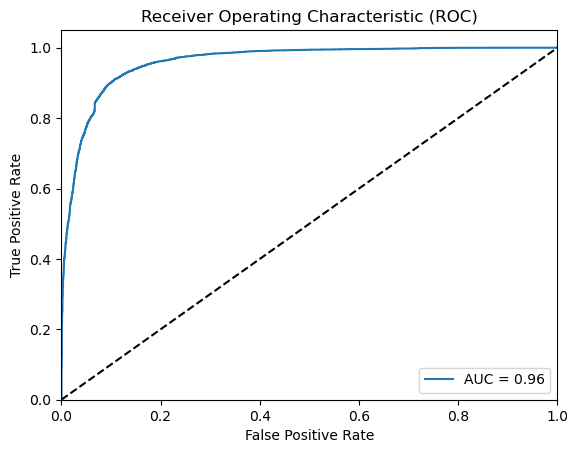

In [27]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

y_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(Y_test, y_prob)
auc = roc_auc_score(Y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()
